In [1]:
import random
import numpy as np
import pandas as pd
# Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
# Scikit learn for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Keras Imports - CNN
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [2]:
import cv2
from keras.models import load_model
import numpy as np
from collections import deque

In [3]:
from keras.callbacks import ModelCheckpoint


In [4]:
import tensorflow as tf

In [10]:
dataset = pd.read_csv('data.csv')


In [11]:
dataset.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka


In [12]:
dataset['character']

0        character_01_ka
1        character_01_ka
2        character_01_ka
3        character_01_ka
4        character_01_ka
              ...       
91995            digit_9
91996            digit_9
91997            digit_9
91998            digit_9
91999            digit_9
Name: character, Length: 92000, dtype: object

In [13]:
X = dataset.iloc[:,:-1]
Y_d = dataset.iloc[:,-1]

In [14]:
X

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1014,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
dataset.describe()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1014,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023
count,92000.0,92000.0,92000.0,92000.0,92000.0,92000.0,92000.0,92000.0,92000.0,92000.0,...,92000.0,92000.0,92000.0,92000.0,92000.0,92000.0,92000.0,92000.0,92000.0,92000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
num_pixels = X.shape[1]
num_classes = 46
img_width = 32
img_height = 32
img_depth = 1

In [17]:
X_images = X.values.reshape(X.shape[0], img_width, img_height)


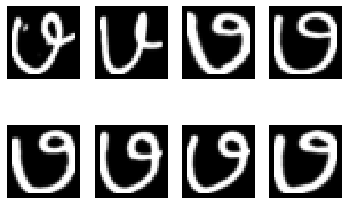

In [76]:
for i in range(1, 9):    
    plt.subplot(240+i)
    plt.axis('off')
    plt.imshow(X_images[i+86000], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
# dataset.iloc[:,1024].value_counts()
# rows_to_remove = np.where(dataset.iloc[:,1024].values==1024)
# rows_to_remove

In [ ]:
# dataset = dataset.drop(dataset.index[rows_to_remove[0]])

In [ ]:
# X = dataset.iloc[:,:-1]
# X_images = X.values.reshape(X.shape[0], img_width, img_height)
# Y_d = dataset.iloc[:,-1]

In [20]:
# output in binary format
from sklearn.preprocessing import LabelBinarizer
binencoder = LabelBinarizer()
Y = binencoder.fit_transform(Y_d)

In [21]:
X = X / 255


In [22]:
seed = 123 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=seed)

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.callbacks import EarlyStopping
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [24]:
seed = 123 
X_train, X_test, y_train, y_test = train_test_split(X_images, Y, test_size=0.20, random_state=seed)

X_train = X_train/255
X_test = X_test/255

In [25]:
X_train = X_train.reshape(X_train.shape[0], img_width, img_height, img_depth).astype('float32')
X_test = X_test.reshape(X_test.shape[0], img_width, img_height, img_depth).astype('float32')

In [5]:
def cnn_model(image_x,image_y):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(32, (4, 4), input_shape=(img_height, img_width, img_depth), 
                     activation='relu', name="conv_1"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), name="pool_1"))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', name="conv_2"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), name="pool_2"))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(50, activation='relu', name="dense_1"))
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax', name="model_output"))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    filepath = "devanagari_model.h5"
    checkpoint1 = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    #checkpoint2 = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
    callbacks_list = [checkpoint1]

    return model, callbacks_list
    

In [27]:
image_x = 32
image_y = 32
model, callbacks_list = cnn_model(image_x,image_y)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=7, batch_size=64,callbacks=callbacks_list)
scores = model.evaluate(X_test, y_test, verbose=0)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 73600 samples, validate on 18400 samples
Epoch 1/7
73536/73600 [============================>.] - ETA: 0s - loss: 0.8214 - acc: 0.7707
Epoch 00001: val_acc improved from -inf to 0.91707, saving model to devanagari_model.h5
73600/73600 [==============================] - 74s 1ms/sample - loss: 0.8209 - acc: 0.7709 - val_loss: 0.2756 - val_acc: 0.9171
Epoch 2/7
73536/73600 [============================>.] - ETA: 0s - loss: 0.2426 - acc: 0.9262
Epoch 00002: val_acc improved from 0.91707 to 0.95299, saving model to devanagari_model.h5
73600/73600 [==============================] - 69s 940us/sample - loss: 0.2425 - acc: 0.9262 - val_loss: 0.1625 - val_acc: 0.9530
Epoch 3/7
73536/73600 [============================>.] - ETA: 0s - loss: 0.1622 - acc: 0.9495
Epoch 00003: val_acc improved from 0.95299 to 0.96239, saving model to devanagari_model.h5
73600/73600 [==============================] - 60s 812us/sa

In [ ]:
from keras.utils import np_utils, print_summary

scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100 - scores[1] * 100))
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
print_summary(model)
model.save('devanagari_refined.h5')

In [7]:
import cv2
from keras.models import load_model
from tensorflow import keras
import numpy as np
from collections import deque
import h5py


In [10]:
model1 = keras.models.load_model('devanagari_model.h5')

In [11]:
def keras_predict(model, image):
    processed = keras_process_image(image)
    print("processed: " + str(processed.shape))
    pred_probab = model.predict(processed)[0]
    pred_class = list(pred_probab).index(max(pred_probab))
    return max(pred_probab), pred_class


In [12]:
def keras_process_image(img):
    image_x = 32
    image_y = 32
    img = cv2.resize(img, (image_x, image_y))
    img = np.array(img, dtype=np.float32)
    img = np.reshape(img, (-1, image_x, image_y, 1))
    return img


In [13]:
pred_classes =['character_01_ka','character_02_kha','character_03_ga','character_04_gha',
             'character_05_kna','character_06_cha','character_07_chha','character_08_ja',
             'character_09_jha','character_10_yna','character_11_taamatar','character_12_thaa',
             'character_13_daa','character_14_dhaa','character_15_adna','character_16_tabala',
             'character_17_tha','character_18_da','character_19_dha','character_20_na','character_21_pa',
             'character_22_pha','character_23_ba','character_24_bha','character_25_ma','character_26_yaw',
             'character_27_ra','character_28_la','character_29_waw','character_30_motosaw',
             'character_31_petchiryakha','character_32_patalosaw','character_33_ha','character_34_chhya',
             'character_35_tra','character_36_gya','digit_0','digit_1','digit_2','digit_3','digit_4',
             'digit_5','digit_6','digit_7','digit_8','digit_9']


In [108]:
# letter_count = {0: 'CHECK', 1: '01_ka', 2: '02_kha', 3: '03_ga', 4: '04_gha', 5: '05_kna', 6: 'character_06_cha',
#                     7: '07_chha', 8: '08_ja', 9: '09_jha', 10: '10_yna',
#                     11: '11_taamatar',
#                     12: '12_thaa', 13: '13_daa', 14: '14_dhaa', 15: '15_adna', 16: '16_tabala', 17: '17_tha',
#                     18: '18_da',
#                     19: '19_dha', 20: '20_na', 21: '21_pa', 22: '22_pha',
#                     23: '23_ba',
#                     24: '24_bha', 25: '25_ma', 26: '26_yaw', 27: '27_ra', 28: '28_la', 29: '29_waw', 30: '30_motosaw',
#                     31: '31_petchiryakha',32: '32_patalosaw', 33: '33_ha',
#                     34: '34_chhya', 35: '35_tra', 36: '36_gya', 37: 'CHECK'}

In [20]:
import cv2 
img = cv2.imread('4571.png')

In [21]:
pred_probab, pred_class = keras_predict(model1, img)
print(pred_class, pred_probab)


processed: (3, 32, 32, 1)
33 1.0


In [22]:
print(pred_classes[pred_class+3])

digit_0
